## **FLAML AutoML Time Series Forecasting Model**

# **Installation**

Installing flaml for time series forecasting

In [ ]:
!pip install "flaml[ts_forecast]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Loading Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


df_TSLA = pd.read_csv("/content/drive/MyDrive/TSLA/TSLA_daily_price.csv")    # Read csv from the directory

## Interpolation
# Make sure there is no missing dates
df_TSLA['Date'] = pd.to_datetime(df_TSLA['Date'])
df_TSLA = df_TSLA.set_index('Date')    # Changing index for Filling values

df_TSLA = df_TSLA.resample('D').first()    # Resampling & Assigning values
df_TSLA = df_TSLA.bfill().ffill()

df_TSLA.reset_index(inplace=True)    # Resetting the index after filling values

df_TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3652 non-null   datetime64[ns]
 1   Open       3652 non-null   float64       
 2   High       3652 non-null   float64       
 3   Low        3652 non-null   float64       
 4   Close      3652 non-null   float64       
 5   Adj Close  3652 non-null   float64       
 6   Volume     3652 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 199.8 KB


# **Splitting Data**

In [ ]:
num_samples = df_TSLA.shape[0]
time_horizon = 500
split_idx = num_samples - time_horizon
x_test = df_TSLA[split_idx:]
y_test = df_TSLA[split_idx:]['Close']
train_TSLA = df_TSLA[:split_idx]

# **Building a Time Series Model**

In [ ]:
from flaml import AutoML

train_TSLA["Date"] = pd.to_datetime(train_TSLA["Date"])


automl = AutoML()
settings = {
    "time_budget": 10,    # Total running time in seconds
    "metric": 'mape',
    "task": 'ts_forecast',
    'log_file_name': 'Stock_Price.log',
    'eval_method': 'auto',
    'seed': 636362    # Random Seed
}
automl.fit(dataframe = train_TSLA,label = 'Close', **settings, period = 180)

[flaml.automl: 10-22 02:07:06] {2600} INFO - task = ts_forecast
INFO:flaml.automl:task = ts_forecast
[flaml.automl: 10-22 02:07:06] {2602} INFO - Data split method: time
INFO:flaml.automl:Data split method: time
[flaml.automl: 10-22 02:07:06] {2605} INFO - Evaluation method: cv
INFO:flaml.automl:Evaluation method: cv
[flaml.automl: 10-22 02:07:06] {2727} INFO - Minimizing error metric: mape
INFO:flaml.automl:Minimizing error metric: mape
[flaml.automl: 10-22 02:07:06] {2869} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'prophet', 'arima', 'sarimax']
INFO:flaml.automl:List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'prophet', 'arima', 'sarimax']
[flaml.automl: 10-22 02:07:06] {3164} INFO - iteration 0, current learner lgbm
INFO:flaml.automl:iteration 0, current learner lgbm
[flaml.automl: 10-22 02:07:06] {3298} INFO - Estimated sufficient time budget=1375s. Estimated necessary time budget

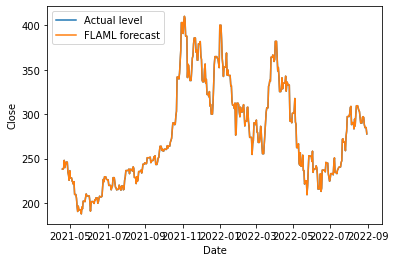

In [ ]:
y_pred = automl.predict(x_test)    # Prediction using the model

import matplotlib.pyplot as plt    # Visualizing

#plt.plot(x_test.Date, y_test, label='Actual level')
plt.plot(x_test.Date, y_pred, label='FLAML forecast')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()